In [10]:
import os

# pysubs2 for subtitles?
# opencv for image processing
import cv2 as cv
import pysubs2

import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

path = '/Users/benjidayan/Documents/torrents/hunter/'
fn = path + 'LR_Chinese_001_720P[52KHD].ts'

In [9]:
fns = os.listdir(path)
fns.sort()
fn = path + fns[0]
fn

'/Users/benjidayan/Documents/torrents/hunter/LR_Chinese_001_720P[52KHD].ts'

In [ ]:
"""ffprobe -v error -select_streams v:0 -show_entries stream=width
,height -of csv=s=x:p=0 ./LR_Chinese_001_720P\[52KHD\].ts
1280x720"""

# https://video.stackexchange.com/questions/4563/how-can-i-crop-a-video-with-ffmpeg

# 140 padding either side, so 1000 width
# 200 height why not
# 500 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=1000:200:140:500" -c:a copy out.mp4

# looking at the text:
# there is about 55 pixels extra space on top,  and 52 on bottom, for double layer text
# for single layer text, there is still 52 on bottom, but of course way extra
# text height is roughly 45 pixels
# text max width seems roughly 465 pixels

# 400 padding either side, so 480 width
# 93 height 
# 555 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=480:93:400:555" -c:a copy out2.mp4

# actually not quite wide enough!
# 380 padding either side, so 530 width
# 93 height 
# 555 padding from top
# ffmpeg -i ./LR_Chinese_001_720P\[52KHD\].ts -filter:v "crop=530:93:380:555" -c:a copy out3.mp4

In [5]:
import cv2 as cv


fn = 'out3.mp4'
cap = cv.VideoCapture(fn)
ret, frame = cap.read()

frame_count = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
print(frame_count)
cap.set(cv.CAP_PROP_POS_FRAMES, 2000)
ret, frame = cap.read()

print(f'fps: {cap.get(cv.CAP_PROP_FPS)}')

42408
fps: 29.97002997002997


In [7]:
2000 /29.970

66.73340006673341

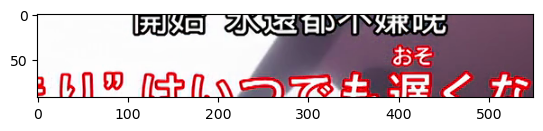

In [4]:
plt.imshow(frame)

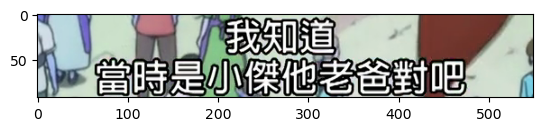

In [11]:
cap.set(cv.CAP_PROP_POS_FRAMES, 7300)
ret, frame = cap.read()
plt.imshow(frame)

In [19]:
cv.imshow('frame window', frame)
cv.waitKey(0)
cv.destroyAllWindows()